                                                FLIGHT PRICE PREDICTION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.cluster import KMeans

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder

from catboost import CatBoostRegressor

from scipy import stats

sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("C:\\Users\\Vishnu\\OneDrive\\Documents\\final year project\\flight project\\clean_dataset.csv", index_col=0)
print("There are {} observations for {} predictors.".format(df.shape[0],df.shape[1]))
df.head()

There are 300153 observations for 11 predictors.


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [4]:
df.describe(include='all')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


<Axes: xlabel='price'>

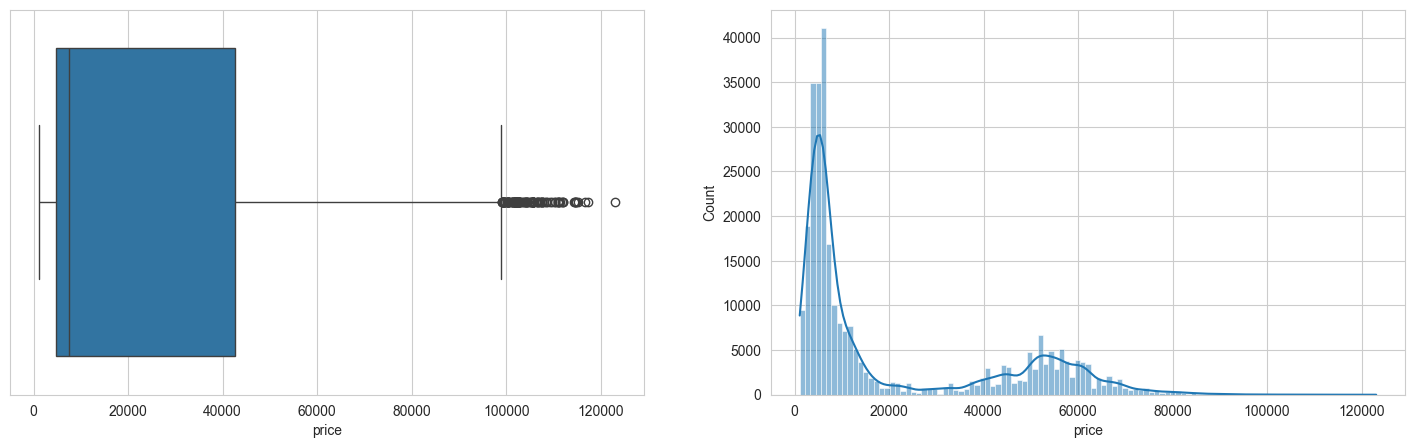

In [5]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,2)
sns.histplot(x = 'price', data = df, kde = True)
plt.subplot(1,2,1)
sns.boxplot(x = 'price', data = df)

Text(0.5, 1.0, 'Airline prices based on the class and company')

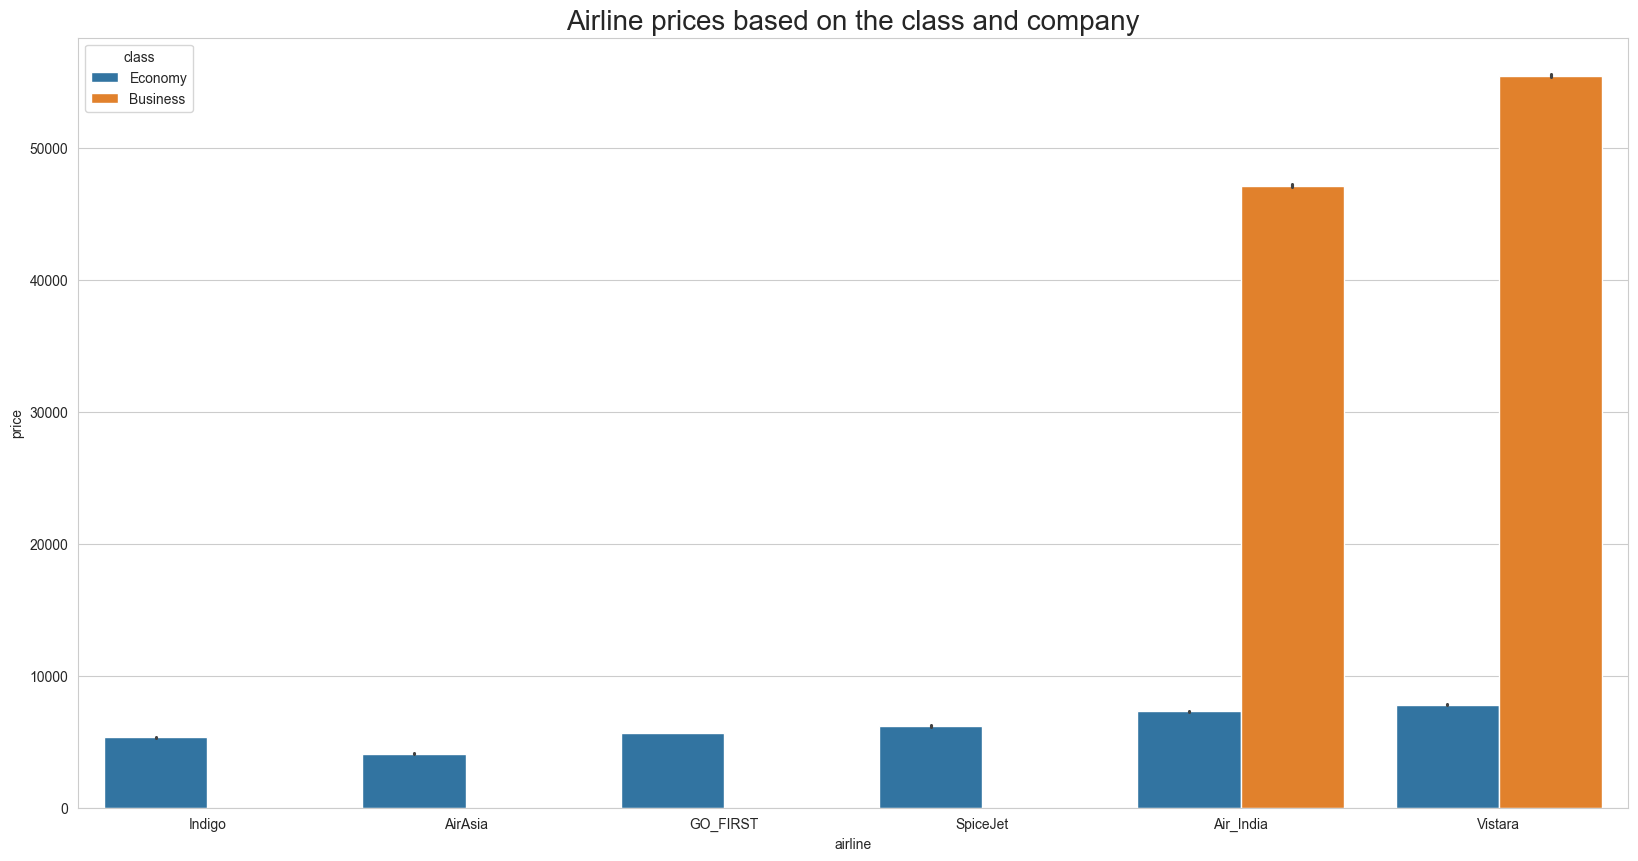

In [6]:
plt.figure(figsize=(20, 10))
sns.barplot(x='airline',y='price',hue="class",data=df.sort_values("price")).set_title('Airline prices based on the class and company',fontsize=20)

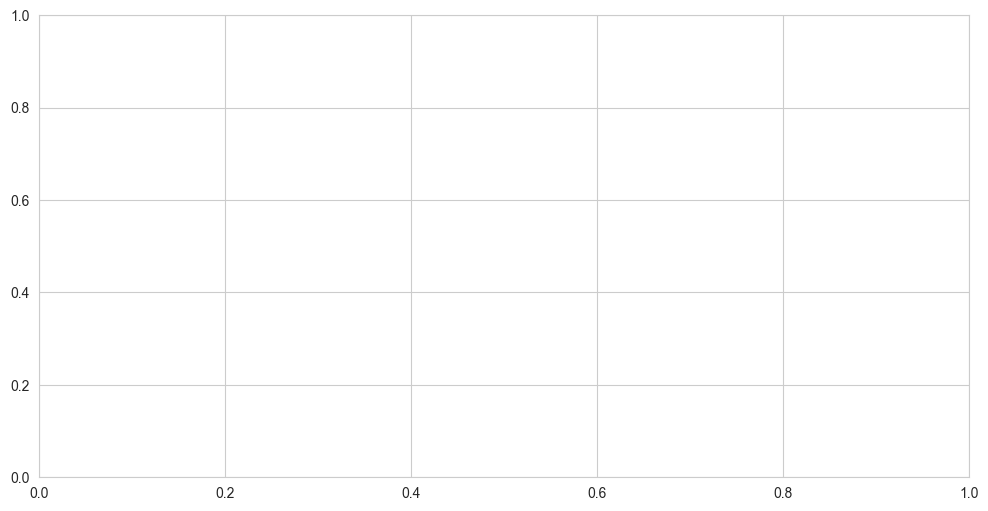

In [7]:
fig, axs = plt.subplots(1, 1, figsize=(12, 6))

In [8]:
df_temp = df.groupby(['days_left'])['price'].mean().reset_index()

C:\Users\Vishnu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxenplot
  warnings.warn(msg, UserWarning)
C:\Users\Vishnu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxenplot
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Airline prices based on companies for business tickets')

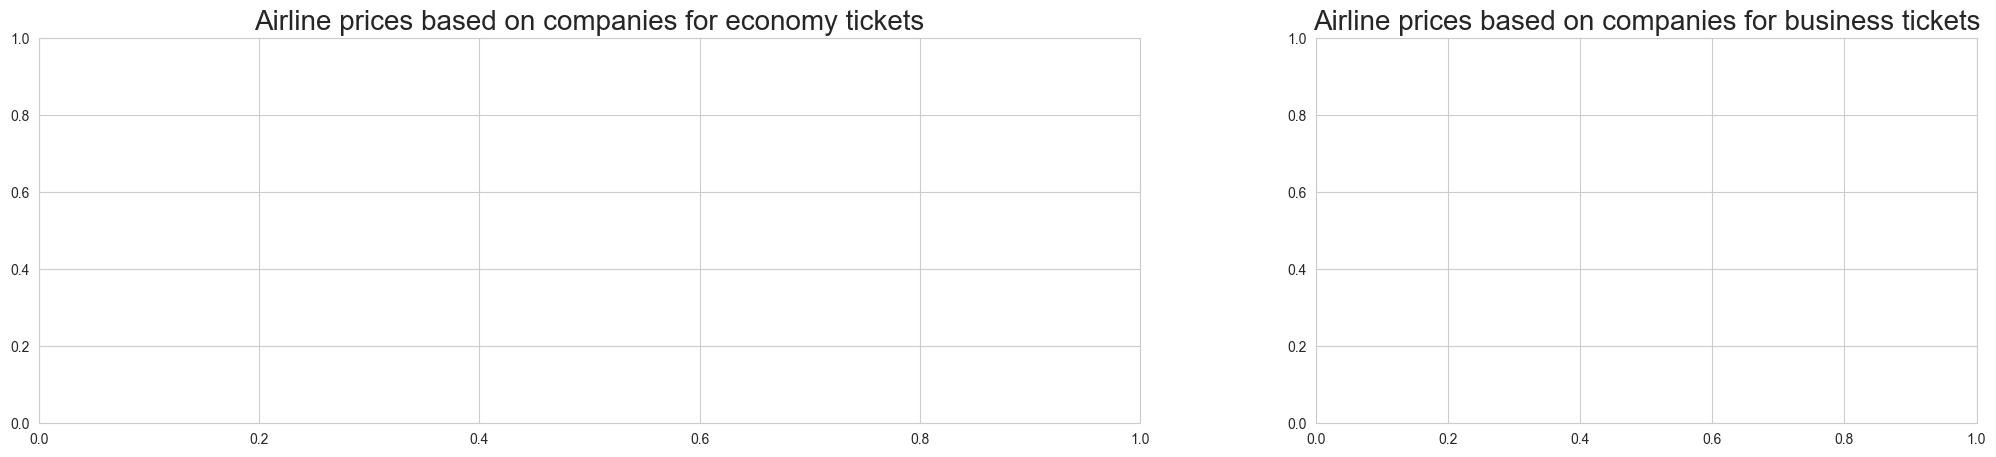

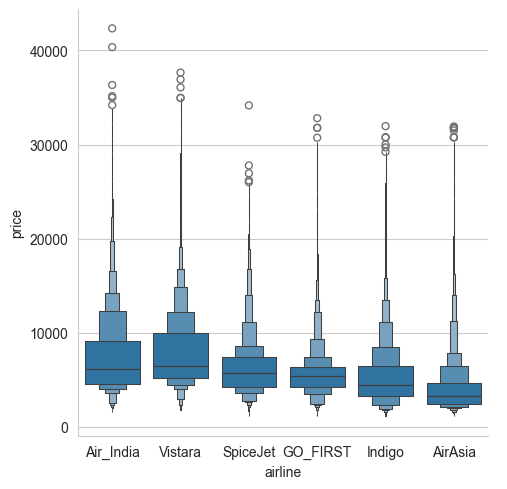

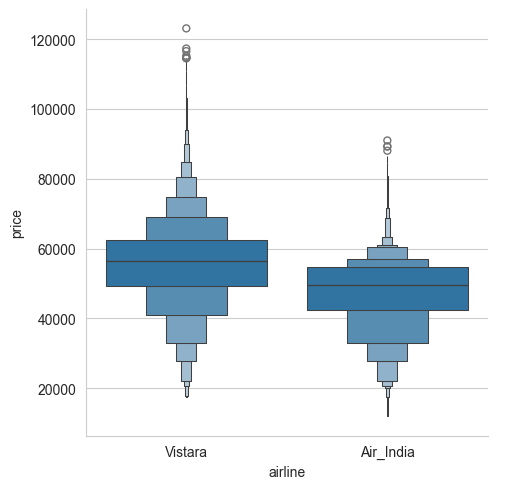

In [9]:
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))
sns.catplot(y = "price", x = "airline",data = df.loc[df["class"]=='Economy'].sort_values("price", ascending = False), kind="boxen", ax=axs[0])
axs[0].set_title("Airline prices based on companies for economy tickets",fontsize=20)
sns.catplot(y = "price", x = "airline",data = df.loc[df["class"]=='Business'].sort_values("price", ascending = False), kind="boxen", ax=axs[1])
axs[1].set_title("Airline prices based on companies for business tickets",fontsize=20)

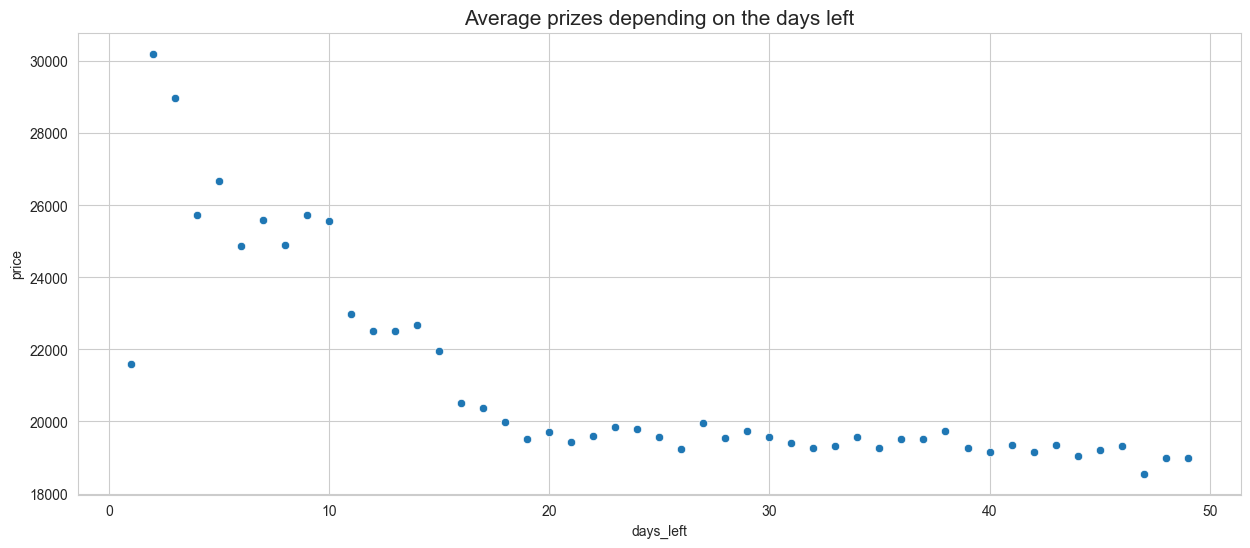

In [10]:
df_temp = df.groupby(['days_left'])['price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="days_left", y="price", data=df_temp).set_title("Average prizes depending on the days left",fontsize=15)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='days_left', ylabel='price'>

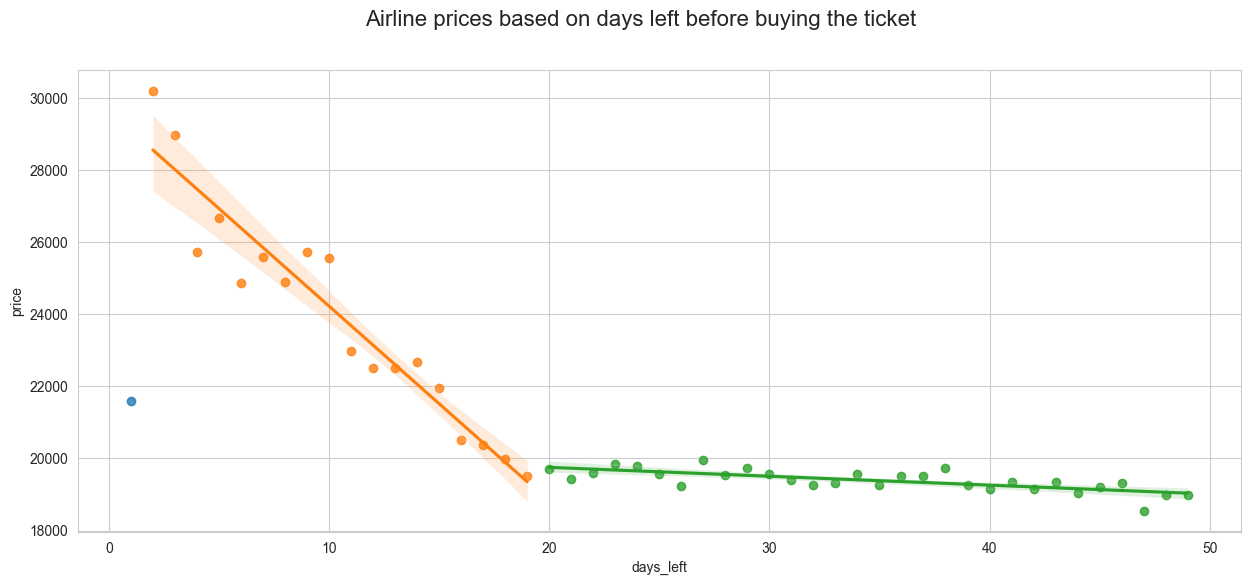

In [12]:
plt.figure(figsize=(15,6)).suptitle('Airline prices based on days left before buying the ticket', fontsize=16)
ax = plt.axes()
sns.regplot(x=df_temp.loc[df_temp["days_left"]==1].days_left, y=df_temp.loc[df_temp["days_left"]==1].price, fit_reg=False, ax=ax)
sns.regplot(x=df_temp.loc[(df_temp["days_left"]>1)&(df_temp["days_left"]<20)].days_left, y=df_temp.loc[(df_temp["days_left"]>1)&(df_temp["days_left"]<20)].price, fit_reg=True, ax=ax)
sns.regplot(x=df_temp.loc[df_temp["days_left"]>=20].days_left, y=df_temp.loc[df_temp["days_left"]>=20].price, fit_reg=True, ax=ax)

A pattern is clearly visible in the way prices evolve depending on the days left.

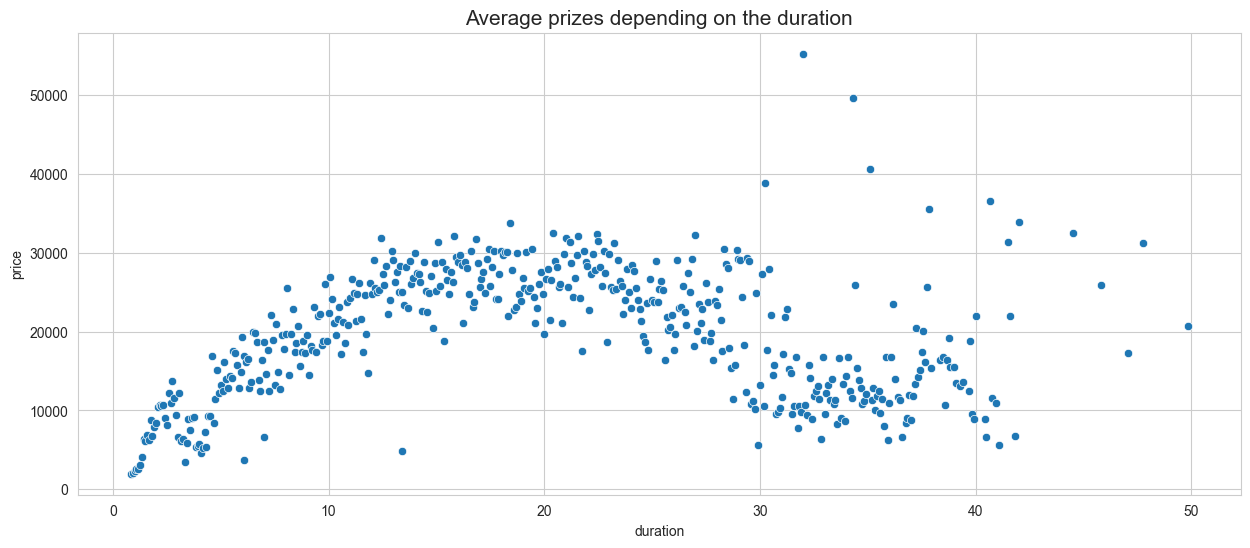

In [13]:
df_temp = df.groupby(['duration'])['price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="duration", y="price", data=df_temp).set_title("Average prizes depending on the duration",fontsize=15)

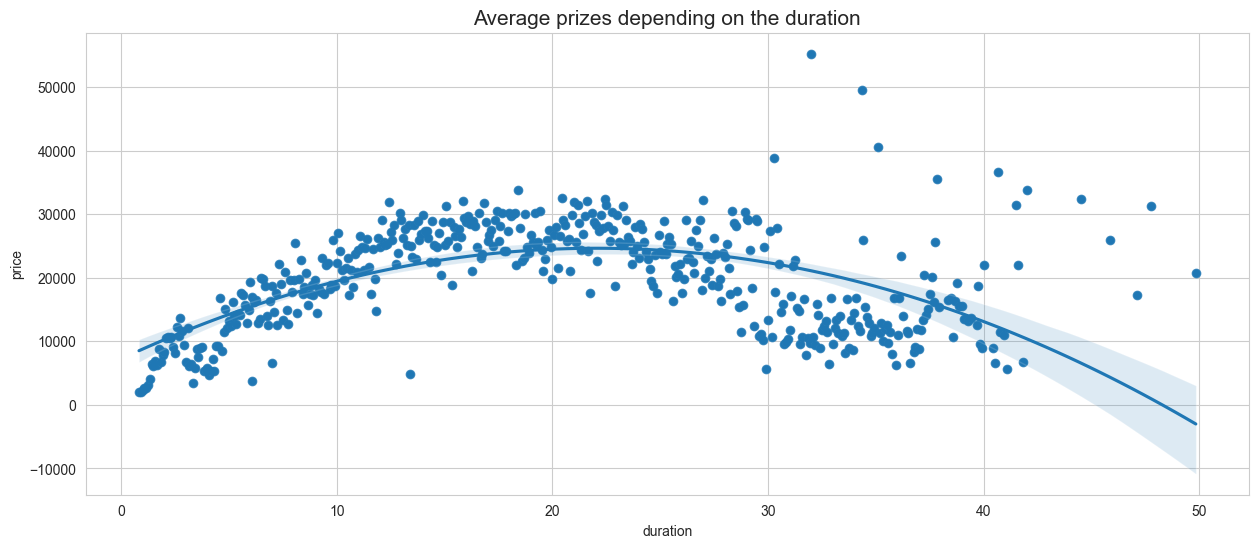

In [14]:
plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="duration", y="price", data=df_temp).set_title("Average prizes depending on the duration",fontsize=15)
ax = sns.regplot(x="duration", y="price", data=df_temp, order=2)

Text(0.5, 1.0, 'Airline prices based on the arrival time')

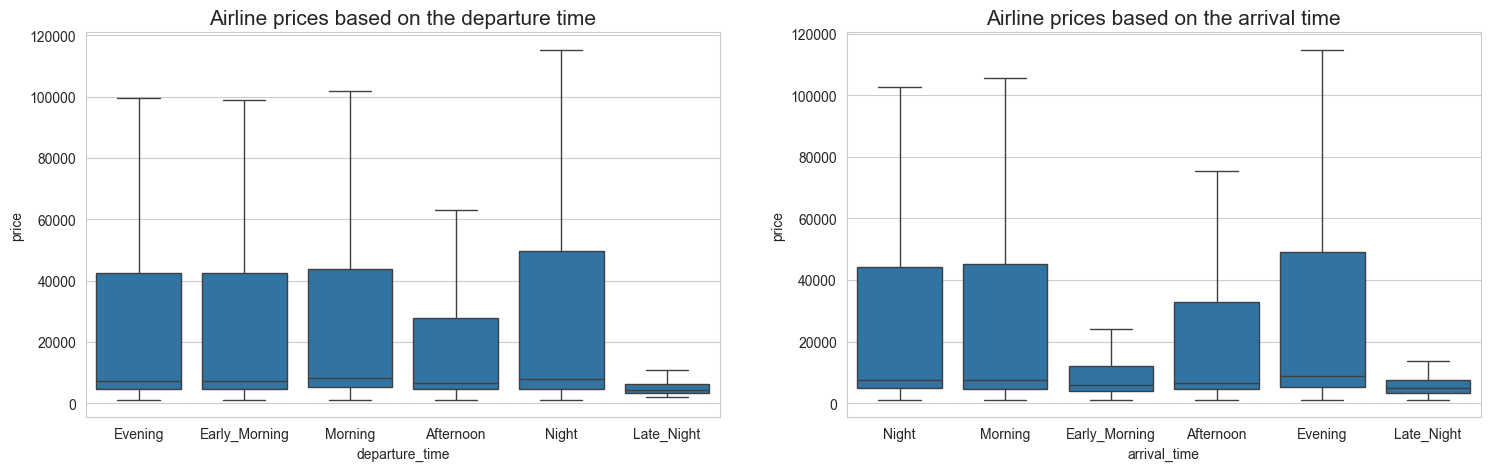

In [15]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, y="price", x="departure_time",showfliers=False).set_title("Airline prices based on the departure time",fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(data=df, y="price", x="arrival_time",showfliers=False).set_title("Airline prices based on the arrival time",fontsize=15)

Text(0.5, 0.98, 'Airline prices based on the source and destination cities')

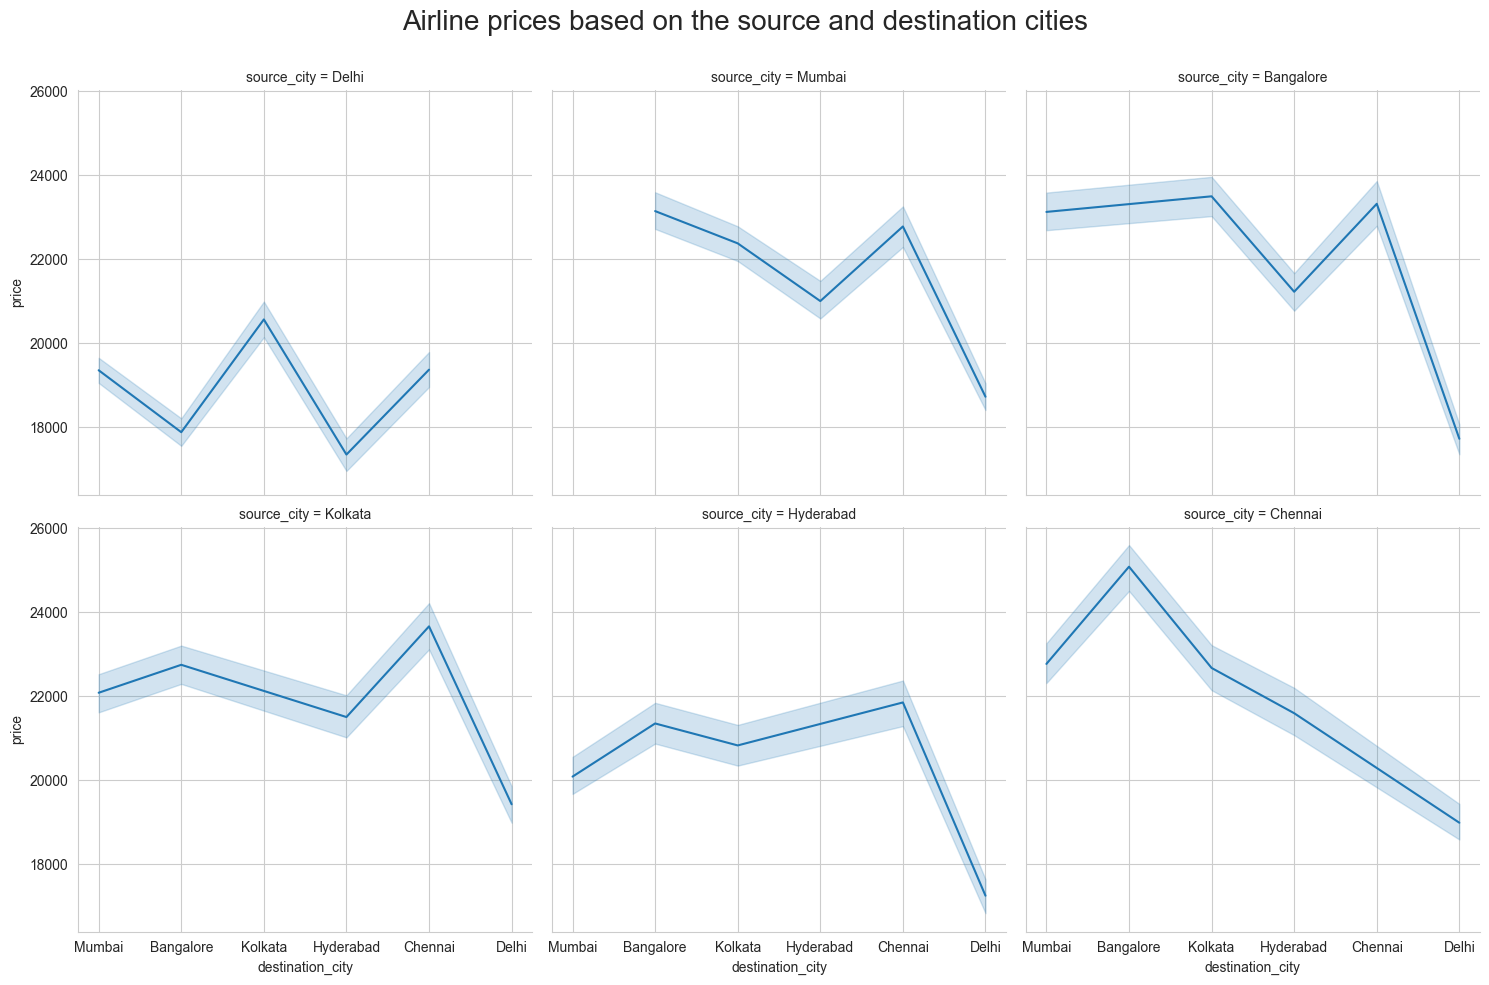

In [16]:
ax = sns.relplot(col="source_city", y="price", kind="line",x='destination_city', data=df, col_wrap=3)
ax.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
ax.fig.suptitle('Airline prices based on the source and destination cities',fontsize=20)

Text(0.5, 1.0, 'Airline prices based on the number of stops  for business')

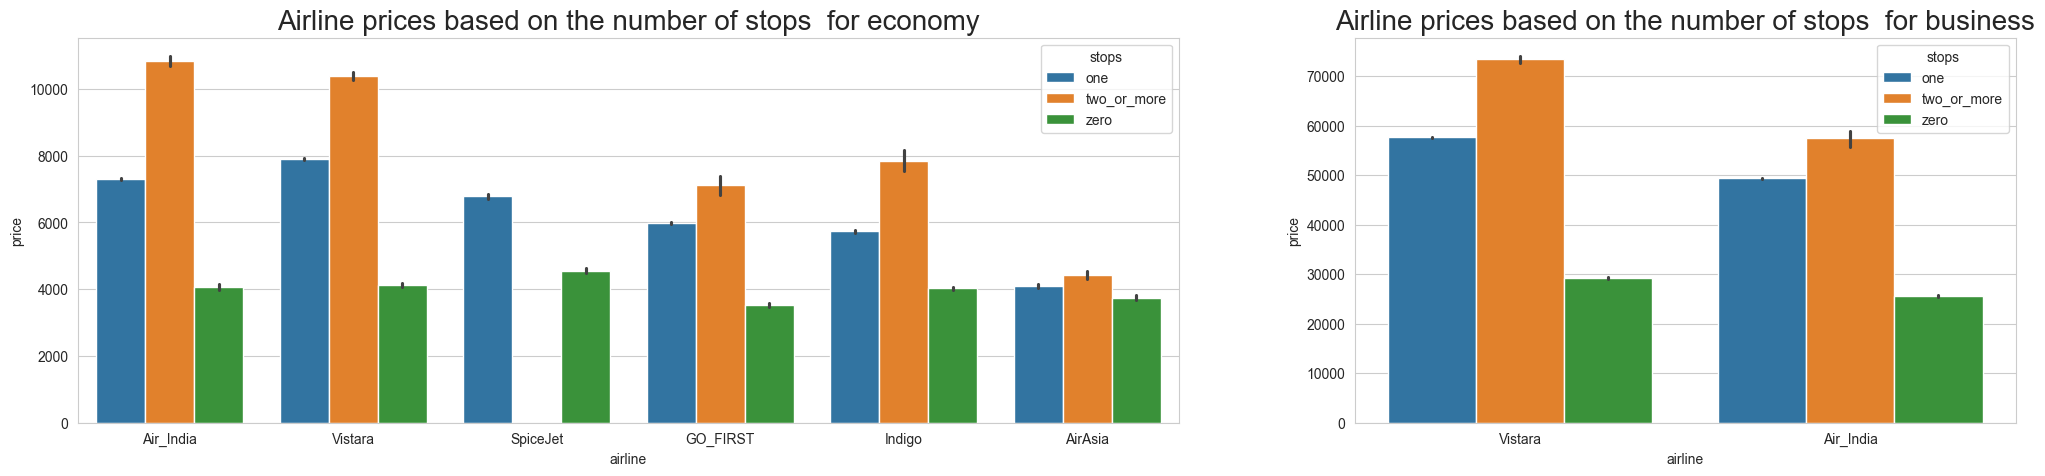

In [17]:
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))
sns.barplot(y = "price", x = "airline",hue="stops",data = df.loc[df["class"]=='Economy'].sort_values("price", ascending = False), ax=axs[0])
axs[0].set_title("Airline prices based on the number of stops  for economy",fontsize=20)
sns.barplot(y = "price", x = "airline",hue="stops",data = df.loc[df["class"]=='Business'].sort_values("price", ascending = False), ax=axs[1])
axs[1].set_title("Airline prices based on the number of stops  for business",fontsize=20)

In [18]:
def preprocessing(df):
    #Encode the ordinal variables "stops" and "class".
    df["stops"] = df["stops"].replace({'zero':0,'one':1,'two_or_more':2}).astype(int)
    df["class"] = df["class"].replace({'Economy':0,'Business':1}).astype(int)
    
    #Create the dummy variables for the cities, the times and the airlines.
    dummies_variables = ["airline","source_city","destination_city","departure_time","arrival_time"]
    dummies = pd.get_dummies(df[dummies_variables], drop_first= True)
    df = pd.concat([df,dummies],axis=1)
    
    #Create the dummy variables for the cities, the times and the airlines.
    df = df.drop(["flight","airline","source_city","destination_city","departure_time","arrival_time"],axis=1)
    
    return df

In [19]:
df_preprocessed = preprocessing(df)

C:\Users\Vishnu\AppData\Local\Temp\ipykernel_19608\1117142630.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["stops"] = df["stops"].replace({'zero':0,'one':1,'two_or_more':2}).astype(int)
C:\Users\Vishnu\AppData\Local\Temp\ipykernel_19608\1117142630.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["class"] = df["class"].replace({'Economy':0,'Business':1}).astype(int)


      I will plot a correlation matrix.

In [20]:
corr_matrix = df_preprocessed.corr()

In [21]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

In [22]:
plt.figure(figsize=(50, 45), dpi=300) 

<Figure size 15000x13500 with 0 Axes>

<Figure size 15000x13500 with 0 Axes>

<Axes: >

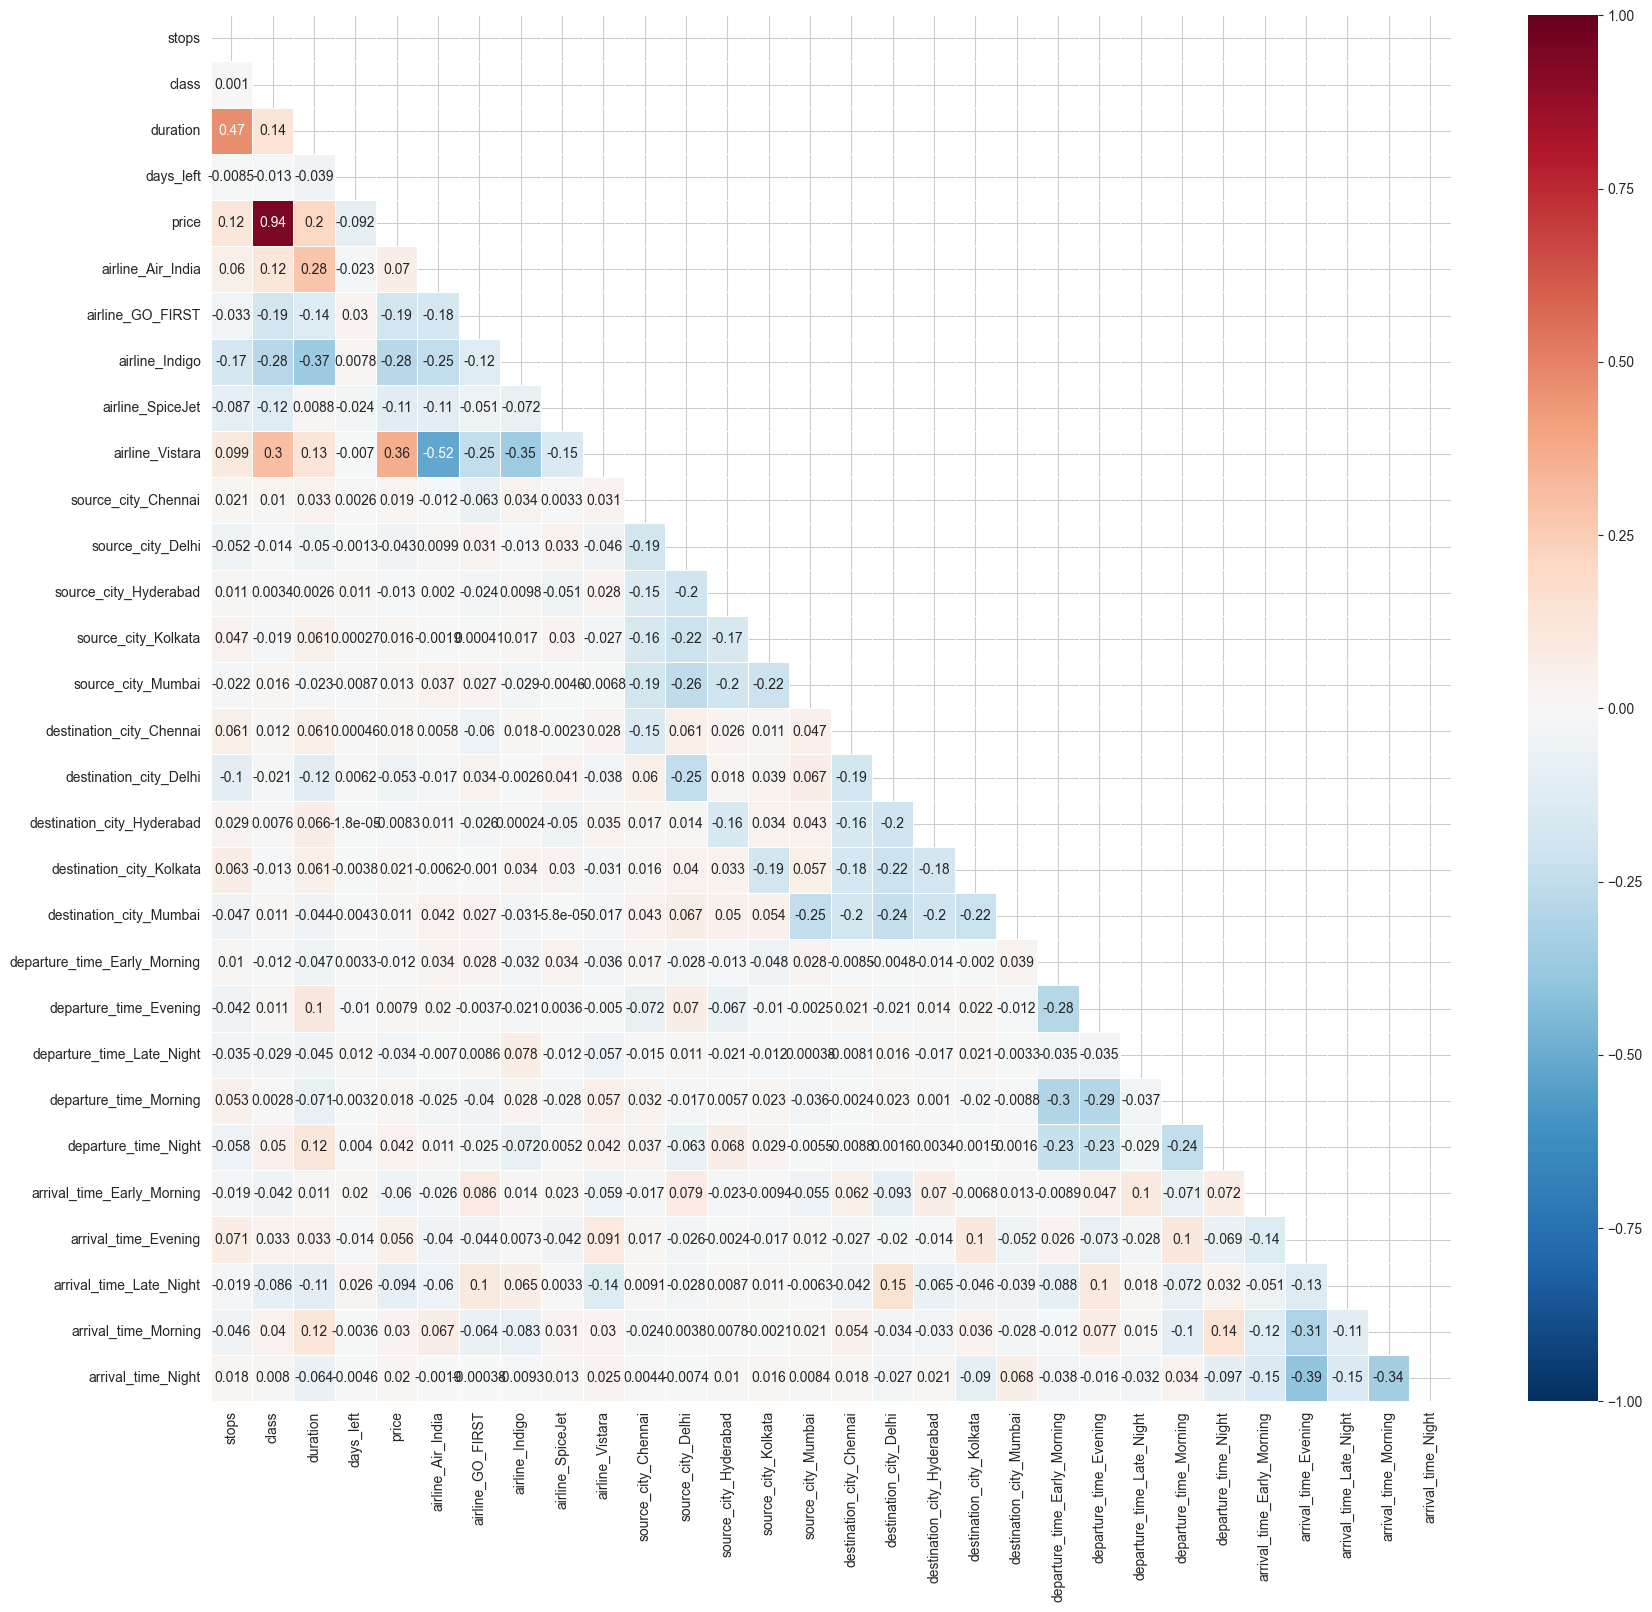

In [23]:

plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, mask=mask, annot=True, vmin=-1.0, vmax=1.0, center=0, cmap='RdBu_r', linewidths=0.5)

In [24]:
plt.show()

In [25]:
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [26]:
X = df_preprocessed.copy()
y = X.pop("price")

mi_scores = make_mi_scores(X, y)

In [27]:
print(mi_scores.sort_values(ascending=False))

duration                        2.415277
class                           0.618093
airline_Vistara                 0.517385
days_left                       0.477406
source_city_Delhi               0.430462
source_city_Mumbai              0.428634
airline_Air_India               0.403297
stops                           0.392738
destination_city_Delhi          0.387216
destination_city_Mumbai         0.382443
source_city_Kolkata             0.360909
source_city_Hyderabad           0.346552
destination_city_Kolkata        0.339796
source_city_Chennai             0.325926
destination_city_Hyderabad      0.318186
destination_city_Chennai        0.302343
airline_Indigo                  0.286906
airline_GO_FIRST                0.202483
arrival_time_Evening            0.127975
arrival_time_Night              0.106256
departure_time_Evening          0.104635
arrival_time_Morning            0.102338
departure_time_Morning          0.092502
departure_time_Early_Morning    0.089224
airline_SpiceJet

Load the data

In [28]:
def load_data():
    # Read data
    df = pd.read_csv("C:\\Users\\Vishnu\\OneDrive\\Documents\\final year project\\flight project\\clean_dataset.csv",index_col=0)
    # Preprocessing the data
    
    df = preprocessing(df)
    
    X = df.copy()
    y = X.pop("price")
    
    xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state = 1,test_size=0.3, shuffle=True)
    
    return xtrain,xtest,ytrain,ytest

In [29]:
pd.set_option('future.no_silent_downcasting', True)


In [30]:
xtrain,xtest,ytrain,ytest = load_data()

Define the best model

In [31]:
models = {}

models["KNeighborsRegressor"]={"model":KNeighborsRegressor(n_neighbors=50)}
models["LinearRegression"]={"model":LinearRegression()}
models["XGBRegressor"]={"model":XGBRegressor(n_jobs=5,learning_rate=0.1,max_depth=10,random_state=1)}
models["CatBoostRegressor"]={"model":CatBoostRegressor(logging_level ='Silent',iterations=500,random_state=1)}

In [32]:
def score_dataset(X, y, model=XGBRegressor()):
    for colname in X.select_dtypes(["category"]):
        X[colname] = X[colname].cat.codes
    
    score_r2 = cross_val_score(model, X, y, cv=5, scoring="r2")
    score_r2 = score_r2.mean()
    
    return score_r2

In [33]:
def get_scores(models,xtrain,ytrain):
    for name,model in models.items():
        model["model"].fit(xtrain,ytrain)

        score_r2 = score_dataset(xtrain, ytrain, model=model["model"])
        score = {'model':"Linear regression", 'score_r2':score_r2}
        print("--- "+name+" ---")
        print("score r2: {}".format(score_r2))
        print("\n")

In [34]:
get_scores(models,xtrain,ytrain)

--- KNeighborsRegressor ---
score r2: 0.70913727980577


--- LinearRegression ---
score r2: 0.9095338142489373


--- XGBRegressor ---
score r2: 0.9822407007217407


--- CatBoostRegressor ---
score r2: 0.9734375563075298




It seems that best results are given by the XGBRegressor. This may be explain by the fact the some relationships ar enot linear like the duration or the days_left. Thus a more flexible algorithm like XGBRegressor tends to give better results.

In [35]:
model = models["XGBRegressor"]["model"]
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

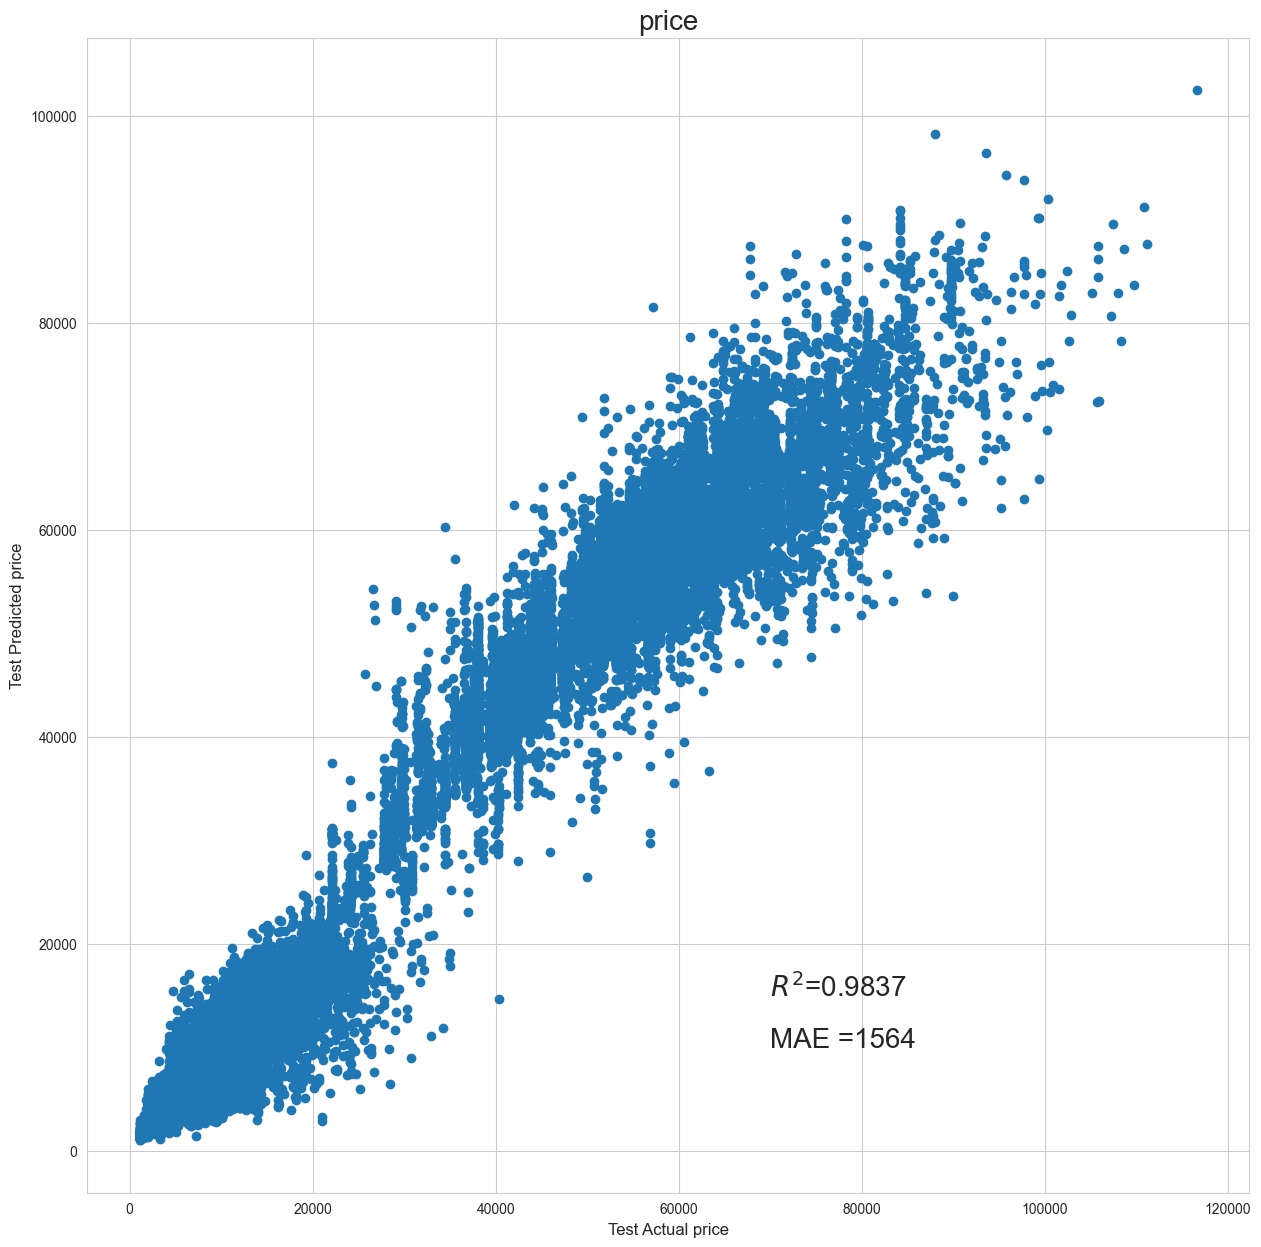

In [36]:
fig,ax = plt.subplots(figsize=(15,15))
ax.set_title("price",fontsize=20)
ax.set_ylabel('Test Predicted price',fontsize=12)
ax.set_xlabel('Test Actual price',fontsize=12)
ax.scatter(ytest,ypred)

score_r2 = r2_score(ytest, ypred) 
score_mae = mean_absolute_error(ytest, ypred)
plt.text(70000,15000,'$ R^{2} $=' + str(round(score_r2, 4)),fontsize=20)
plt.text(70000,10000,'MAE =' + str(round(score_mae)),fontsize=20)
plt.show()

In [37]:
def stackblend_reg(x_train,y_train,x_test,models,code,N=20,final_layer=LinearRegression()):
    
    def get_dataset(x_train,y_train,N=5) :
        merge = pd.concat([x_train,y_train],axis=1)
        merge = merge.sample(frac=1, random_state=1).reset_index(drop=True)
        y_train = merge.iloc[:,(merge.shape[1]-1):(merge.shape[1])]
        x_train = merge.iloc[:,0:(merge.shape[1]-1)]

        z = int(len(x_train)/N)
        start = [0]
        stop = []
        for i in range(1,N):
            start.append(z*i)
            stop.append(z*i)
        stop.append(len(x_train))

        c = list()
        train_data = list()
        test_data = list()
        y_data = list()
        for i in range(0,N):
            c=list(range(start[i],stop[i]))
            train_data.append(x_train.iloc[[k for k in range(0,len(x_train)) if k not in c],:])
            y_data.append(y_train.iloc[[k for k in range(0,len(y_train)) if k not in c],:])
            test_data.append(x_train.iloc[c,:])

        return(train_data,y_data,test_data,y_train)
    
    datasets = get_dataset(x_train,y_train,N)
    train_data = datasets[0]
    y_data = datasets[1]
    test_data = datasets[2]
    final_y =  datasets[3]
    
    def stack(x_train, y_train , x_test , models=models,code=code):
    
        def flatten_list(_2d_list):
            flat_list = []
            for element in _2d_list:
                if type(element) is list:
                    for item in element:
                        flat_list.append(item)
                else:
                    flat_list.append(element)
            return flat_list

        result = list()
        for i in list(range(len(models))):
            reg = models[i]
            reg.fit(x_train,y_train)
            test_pred = flatten_list(reg.predict(x_test).tolist())
            result.append(test_pred)

        result_df = pd.DataFrame()    
        for i in list(range(len(code))):
            result_df[code[i]] = result[i]
        return result_df
    final_df = pd.DataFrame(columns = code)
    
    for i in range(0,len(train_data)):
        current_df = stack(train_data[i],y_data[i],test_data[i],models,code)
        final_df = pd.concat([final_df,current_df])
        
    final_test = stack(x_train,y_train,x_test,models,code)
    
    reg2 = final_layer
    reg2.fit(final_df,final_y)
    test_pred = reg2.predict(final_test)
    
    return test_pred

In [38]:
stack_pred = stackblend_reg(xtrain,ytrain,xtest,
                            models = [XGBRegressor(n_jobs=5,learning_rate=0.1,max_depth=10,random_state=1),
                                      LinearRegression(),
                                    KNeighborsRegressor(n_neighbors=50),
                                     CatBoostRegressor(logging_level ='Silent',iterations=500,random_state=1)],
                            code = ['xgb_reg','lin_reg','knn_reg','cat_reg'],N=10,
                            final_layer=XGBRegressor(n_jobs=5,learning_rate=0.1,max_depth=10,random_state=1))

C:\Users\Vishnu\AppData\Local\Temp\ipykernel_19608\881741414.py:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([final_df,current_df])


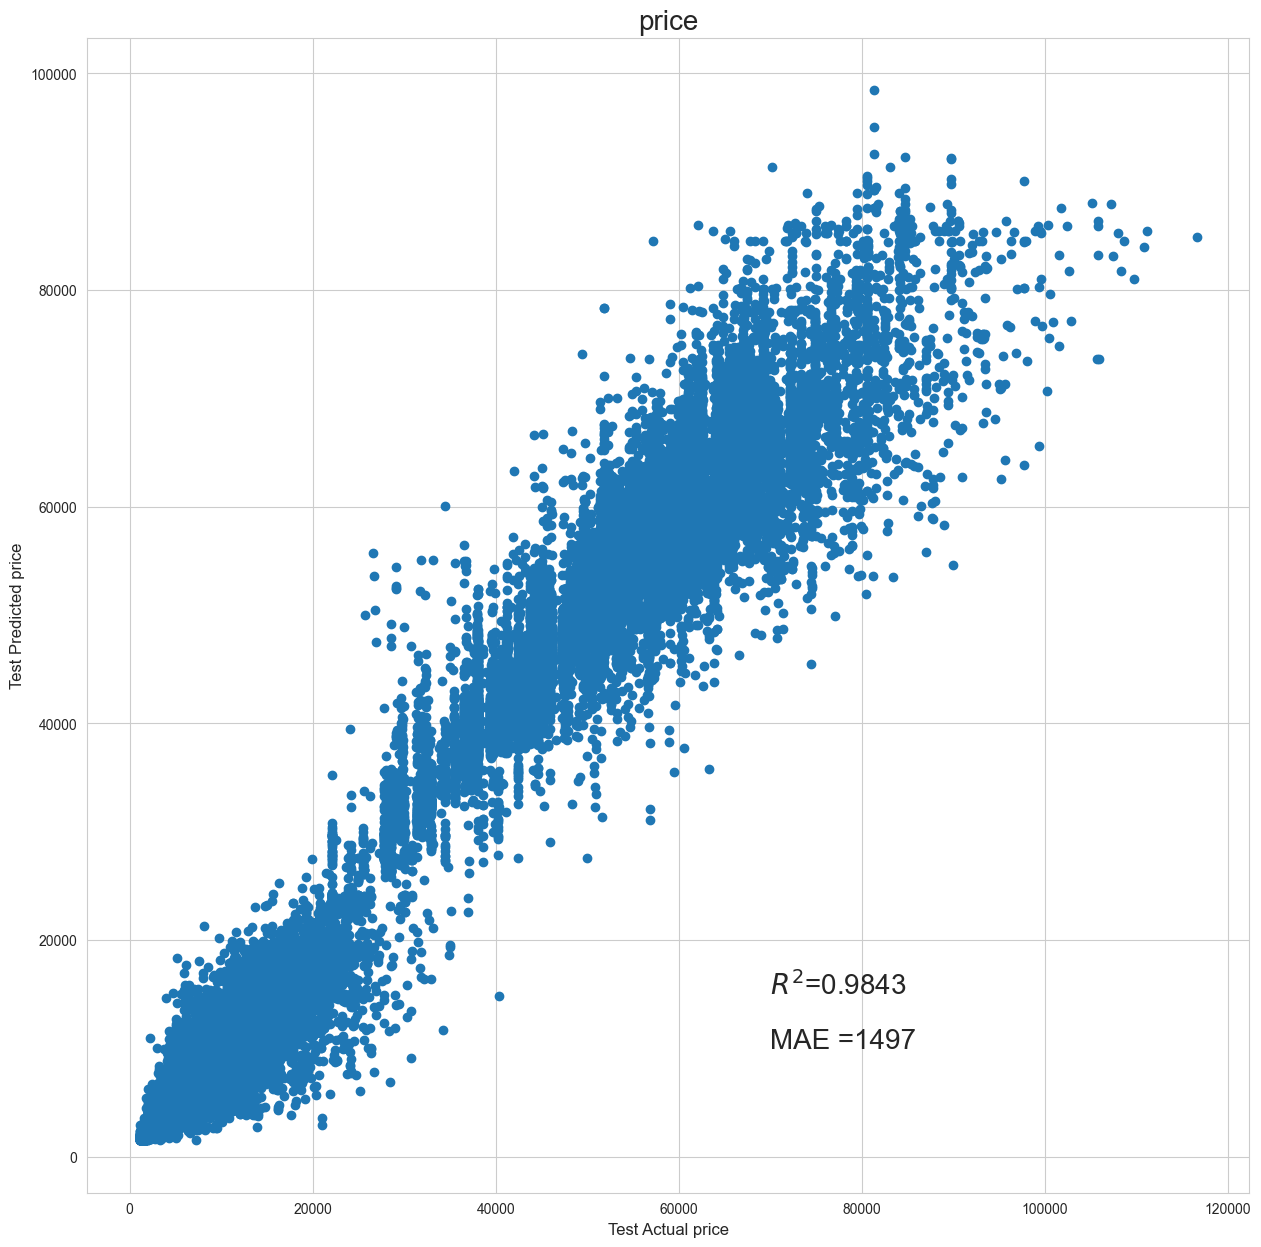

In [39]:
score_r2 = r2_score(ytest, stack_pred) 
score_mae = mean_absolute_error(ytest, stack_pred)
fig,ax = plt.subplots(figsize=(15,15))
ax.set_title("price",fontsize=20)
ax.set_ylabel('Test Predicted price',fontsize=12)
ax.set_xlabel('Test Actual price',fontsize=12)
ax.scatter(ytest,stack_pred)

score_r2 = r2_score(ytest, stack_pred) 
score_mae = mean_absolute_error(ytest, stack_pred)
plt.text(70000,15000,'$ R^{2} $=' + str(round(score_r2, 4)),fontsize=20)
plt.text(70000,10000,'MAE =' + str(round(score_mae)),fontsize=20)
plt.show()